In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ss_data=pd.read_csv('SampleSuperstore.csv')
ss_data.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [4]:
ss_data.shape

(9994, 13)

In [5]:
ss_data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
ss_data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [7]:
ss_data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
ss_data.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
pr=ss_data['Profit']
pr

0        41.9136
1       219.5820
2         6.8714
3      -383.0310
4         2.5164
          ...   
9989      4.1028
9990     15.6332
9991     19.3932
9992     13.3200
9993     72.9480
Name: Profit, Length: 9994, dtype: float64

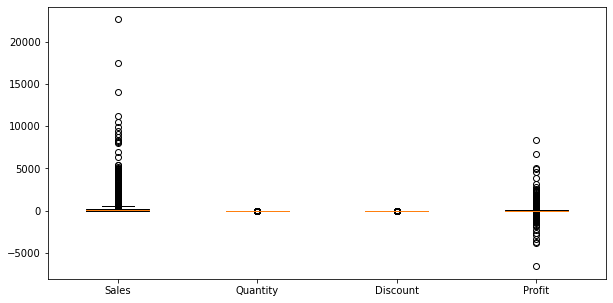

In [19]:
plt.figure(figsize=(10,5))
plt.boxplot(n_data,labels=n_data.columns)
plt.show()

From the above boxplot we can see that data is scattered and needs Normalization

C:\Users\hp\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


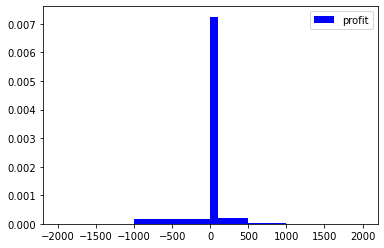

In [18]:
#Without scaling we get this histogram
y=pr.values.reshape(-1,1)
bins_list=[-2000,-1000,0,100,100,500,1000,2000]
plt.hist(y,bins=bins_list, density = True, 
         histtype ='bar',
         color = 'blue',
         label = 'profit')
plt.legend()

In [13]:
Ship_mode=ss_data['Ship Mode']
Ship_mode.unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [14]:
Segment=ss_data['Segment']
Segment.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [15]:
Countries=ss_data['Country']
Countries.unique()

array(['United States'], dtype=object)

In [16]:
import collections
Cities=ss_data['City']
ct=Cities.unique()
print(Cities.unique())
print("-----------------------------------------------------------------")
print('Number of unique cities are in total: ',len(ct))

['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego' 'Brentwood' 'Chapel Hill'
 'Morristown' 'Cincinnati' 'Inglewood' 'Tamarac' 'Colorado Springs'
 'Belleville' 'Taylor' 'Lakewood' 'Arlington' 'Arvada' 'Hackensack'
 'Saint Petersburg'

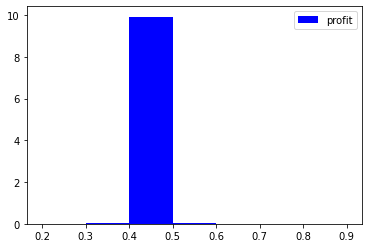

In [20]:
#histogram only on profit 
#Also scaling the profit data
scaler = MinMaxScaler()
x=pr.values.reshape(-1,1)
x_scaled = scaler.fit_transform(x)
#x_scaled
#print(pr)
bins_list = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
plt.hist(x_scaled, bins=bins_list, density = True, 
         histtype ='bar',
         color = 'blue',
         label = 'profit')
plt.legend()

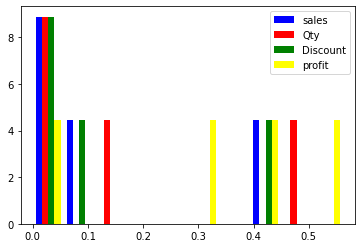

In [17]:
#Scaling data- all our numerical relevant data data is scaled between 0-1 
#visualizing the scaled numerical data 
from sklearn.preprocessing import MinMaxScaler
import random
n_data=ss_data[['Sales','Quantity','Discount','Profit']]
scaler = MinMaxScaler()
scaled=scaler.fit_transform(n_data)
#print(scaled)
#random.choice(scaled)
sales=scaled[0]
Qty=scaled[1]
Discount=scaled[2]
profit=scaled[3]
colors=['blue','red','green','yellow']
#print(scaled[3])
x_scaled=[sales,Qty,Discount,profit]
plt.hist(x_scaled, density = True, 
         histtype ='bar',
         color = colors,
         label =['sales','Qty','Discount','profit'])
plt.legend()